In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pylab as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Loading Data from Clustering Model

In [3]:
# Loading required data
cluster_data = pd.read_csv('classification_df.csv')
entry = pd.read_csv('user_input_dict.csv')
merged = pd.read_csv('merged_datasets.csv')

# Filtering out Small Clusters

Clusters that are too small have to be filtered out in order for the model to work.

In [6]:
# Print number of universities in each cluster
cluster_data['Cluster'].value_counts()

Cluster
1    16
2    15
4     9
0     5
3     5
Name: count, dtype: int64

In [7]:
# Minimum size of clusters
min_cluster_size = 4

# Identify clusters below the threshold
cluster_counts = cluster_data['Cluster'].value_counts()
small_clusters = cluster_counts[cluster_counts < min_cluster_size].index

# Drop universities in small clusters
uni_data_filtered = cluster_data[cluster_data['Cluster'].apply(lambda x: x not in small_clusters)]

uni_data_filtered['Cluster'].value_counts()

Cluster
1    16
2    15
4     9
0     5
3     5
Name: count, dtype: int64

# Training Random Forest Model

In [9]:
# Assign input and labels
y = uni_data_filtered['Cluster']
X = uni_data_filtered.drop(columns=['Cluster', 'University Name'])

# Train-test split with stratification on the cluster labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Fit the random forest model
model = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=None)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         4
           3       1.00      0.50      0.67         2
           4       0.75      1.00      0.86         3

    accuracy                           0.93        15
   macro avg       0.95      0.90      0.90        15
weighted avg       0.95      0.93      0.93        15



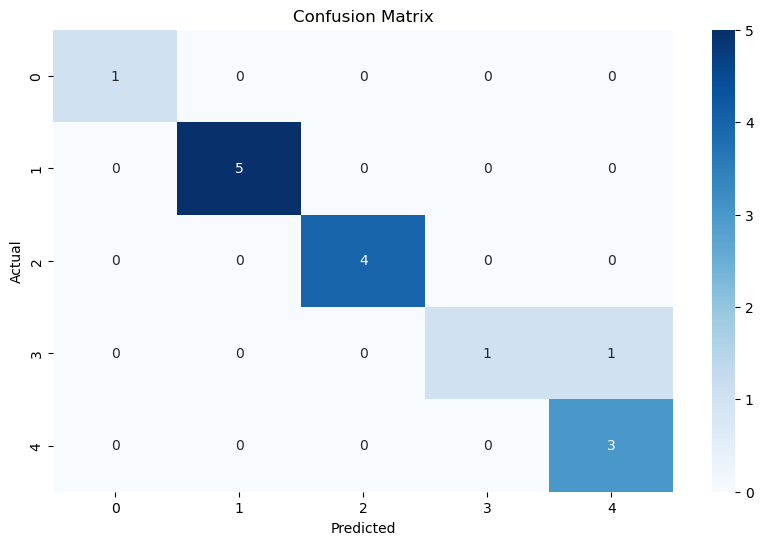

In [10]:
# Calculate the confusion matrix
confusion_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix, annot=True, cmap="Blues")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [11]:
# Train model on full dataset
model.fit(X, y)

RandomForestClassifier(random_state=42)

# Predicting on User Input

In [13]:
# Predict probabilities
predicted_probabilities = model.predict_proba(entry)
print("Predicted Probabilities:", predicted_probabilities)

# Predict the label of the user input
predicted_label = model.predict(entry)
print("Predicted Label:", predicted_label[0])

Predicted Probabilities: [[0.05 0.01 0.87 0.04 0.03]]
Predicted Label: 2


# Displaying Recommended Universities

In [15]:
# Filter for selected cluster
results = merged[cluster_data['Cluster'] == predicted_label[0]]

# Sort by 'ar score'
results = results.sort_values('ar score', ascending=False)

# Keep only the user's selected features
results = results.loc[:, results.columns.isin(uni_data_filtered.columns)].reset_index(drop=True)

# Show results
results

,University Name,Out of State Tuition,Number of Students,Retention Rate,Research Score,er score,Safety,Social,Average Sentiment
0,Massachusetts Institute of Technology,57986,4638,0.9898,54.9,100.0,4.5,3.7,0.585213
1,Stanford University,58416,7761,0.9831,61.5,100.0,4.5,4.0,0.581759
2,"University of California, Berkeley",44467,32475,0.9588,48.2,100.0,2.7,4.0,0.639878
3,Yale University,62250,6639,0.9810,50.2,99.9,3.6,4.0,0.597000
4,Princeton University,57410,5527,0.9705,39.3,97.5,4.5,4.1,0.534225
5,"University of Michigan, Ann Arbor",55334,32448,0.9721,53.6,89.9,4.4,4.4,0.628548
6,Cornell University,63200,16071,0.9600,49.1,90.5,4.4,4.0,0.553095
7,University of Pennsylvania,63452,10572,0.9837,53.2,89.1,3.5,4.2,0.521849
8,"University of Texas, Austin",41070,40980,0.9530,40.5,83.2,3.4,4.4,0.628562
9,Duke University,62688,6570,0.9685,47.4,69.3,4.4,4.4,0.729300


In [16]:
# Full data for each selected university
more_info = merged[cluster_data['Cluster'] == predicted_label[0]].drop(columns='University ID').sort_values('ar score', ascending=False).reset_index(drop=True)

# Save selected universities to a csv file
more_info.to_csv('recommended_universities.csv', index=False)

# Show full data for each selected university
more_info

,University Name,In State Tuition,Out of State Tuition,Admission Rate,Number of Students,Graduation Rate 4-years,Earnings After 10 Years,Retention Rate,Diversity Score,Public or Private,...,ar score,er score,isr score,fsr score,ifr score,Acres,Safety,Facilities,Social,Average Sentiment
0,Massachusetts Institute of Technology,57986,57986,0.0396,4638,0.9557,143372,0.9898,0.699191,0,...,100.0,100.0,88.2,100.0,100.0,168.0,4.5,3.7,3.7,0.585213
1,Stanford University,58416,58416,0.0368,7761,0.9534,124080,0.9831,0.694972,0,...,100.0,100.0,51.2,100.0,99.9,8180.0,4.5,4.5,4.0,0.581759
2,"University of California, Berkeley",14395,44467,0.1133,32475,0.9346,92446,0.9588,0.654043,1,...,100.0,100.0,63.9,20.5,92.2,1232.0,2.7,4.1,4.0,0.639878
3,Yale University,62250,62250,0.0457,6639,0.9736,100533,0.9810,0.702715,0,...,99.9,99.9,78.8,100.0,89.8,1108.0,3.6,4.1,4.0,0.597000
4,Princeton University,57410,57410,0.0570,5527,0.9744,110066,0.9705,0.701479,0,...,99.8,97.5,57.5,64.5,16.7,600.0,4.5,4.4,4.1,0.534225
5,"University of Michigan, Ann Arbor",16736,55334,0.1769,32448,0.9340,83648,0.9721,0.632797,1,...,98.3,89.9,27.6,82.2,67.0,3070.0,4.4,4.5,4.4,0.628548
6,Cornell University,63200,63200,0.0790,16071,0.8800,104043,0.9600,0.661828,0,...,98.1,90.5,64.0,52.9,68.7,2300.0,4.4,4.6,4.0,0.553095
7,University of Pennsylvania,63452,63452,0.0650,10572,0.9615,111371,0.9837,0.709739,0,...,96.4,89.1,70.3,99.9,96.0,299.0,3.5,4.2,4.2,0.521849
8,"University of Texas, Austin",11698,41070,0.3135,40980,0.8777,75121,0.9530,0.684622,1,...,93.5,83.2,11.0,8.9,9.3,431.0,3.4,4.3,4.4,0.628562
9,Duke University,62688,62688,0.0635,6570,0.9625,97800,0.9685,0.700444,0,...,85.7,69.3,52.2,100.0,16.8,8693.0,4.4,4.8,4.4,0.729300


# Displaying Filtered out Universities

These are the universities that are in clusters that are too small for the model to predict.

In [19]:
# Results in small clusters
other_results = merged[cluster_data['Cluster'].isin(small_clusters)].sort_values('ar score', ascending=False)

# Show other potential results
other_results

,University Name,In State Tuition,Out of State Tuition,Admission Rate,Number of Students,Graduation Rate 4-years,Earnings After 10 Years,Retention Rate,Diversity Score,Public or Private,...,er score,isr score,fsr score,ifr score,Acres,University ID,Safety,Facilities,Social,Average Sentiment
